**Ex. 1** - kNN - own implementation

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from scipy.stats import mode
from sklearn.metrics import accuracy_score


In [3]:
iris = datasets.load_iris()

#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.3)
 
#An example of using the Euclidean distance
a = (1, 2, 3)
b = (4, 5, 6)
dst = distance.euclidean(a, b)
 


In [4]:
def kNN(example, data, labels, k):
  distances = list()
  for id, elem in enumerate(data):
    distances.append((id, distance.euclidean(example, elem)))
  distances.sort(key=lambda x: x[1])
  nearest_labels = [labels[neighbour[0]] for neighbour in distances[:k]]
  assigned_label = max(set(nearest_labels), key=nearest_labels.count)
  return assigned_label

def predictions(data, labels, k, pred_points=None):
  predictions = list()
  if pred_points is None:
    pred_points = data

  for elem in pred_points:
    predictions.append(kNN(elem, data, labels, k))

  return predictions



In [5]:
train_accuracy_lst = list()
test_accuracy_lst = list()
n = iris.data.shape[0]
for k in range(1, n):
  test_accuracy_lst.append(accuracy_score(labels_test, predictions(features_train, labels_train, k, features_test)))

  train_accuracy_lst.append(accuracy_score(labels_train, predictions(features_train, labels_train, k)))

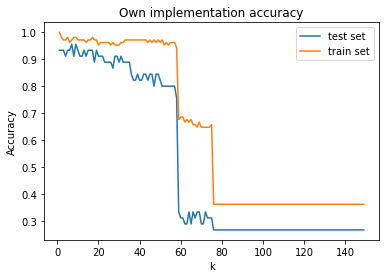

In [6]:
import matplotlib.pyplot as plt
import numpy as np
k_vector = np.arange(1, n, 1)
plt.figure()
plt.plot(k_vector, test_accuracy_lst)
plt.plot(k_vector, train_accuracy_lst)
plt.legend(['test set', 'train set'])
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Own implementation accuracy")
plt.show()

In [7]:
print(f"Top 5 best scores on test set:")
best = [(i, test_accuracy_lst[i]) for i in range(len(test_accuracy_lst))]
best.sort(key=lambda x: x[1])
for best_elem in best[-6:]:
  print(f"Accuracy: {best_elem[1]} for k = {best_elem[0]}")

Top 5 best scores on test set:
Accuracy: 0.9333333333333333 for k = 14
Accuracy: 0.9333333333333333 for k = 15
Accuracy: 0.9333333333333333 for k = 16
Accuracy: 0.9333333333333333 for k = 18
Accuracy: 0.9555555555555556 for k = 6
Accuracy: 0.9555555555555556 for k = 8


**Ex. 2** - kNN - Python (sklearn)

In [8]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [9]:
sklearn_test_acc = list()
sklearn_train_acc = list()

for k in range(1,100):
  sk_knn = KNeighborsClassifier(n_neighbors=k)
  sk_knn.fit(features_train, labels_train)

  predictions = list()

  y_pred_train = sk_knn.predict(features_train)
  y_pred_test = sk_knn.predict(features_test)

  sklearn_test_acc.append(accuracy_score(labels_test, y_pred_test))
  sklearn_train_acc.append(accuracy_score(labels_train, y_pred_train))


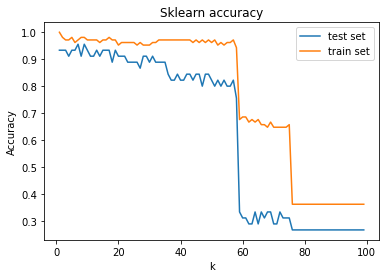

In [10]:
import matplotlib.pyplot as plt
import numpy as np
k_vector = np.arange(1, 100, 1)
plt.figure()
plt.plot(k_vector, sklearn_test_acc)
plt.plot(k_vector, sklearn_train_acc)
plt.legend(['test set', 'train set'])
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Sklearn accuracy")
plt.show()

**Ex.3** - Decision trees

In [11]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [12]:
from six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("iris.pdf")

In [13]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import pandas as pd
from tensorflow.keras.datasets import mnist

from matplotlib import pyplot as plt



# loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

**Ex. 3.** Please display sample digits from the dataset.

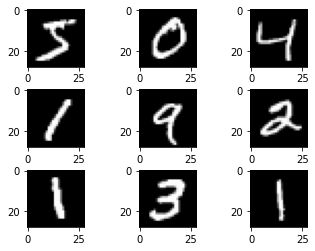

In [15]:
for i in range(9):  
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.subplots_adjust(wspace=0, hspace=0.4)
plt.show()

**Ex. 4.** Please divide the dataset into learner (70%) and training. 

ANS: In keras library mnist comes already divided into test and training sets.

In [16]:
# Changing input to MxN matrices, where M is the number of examples and N is the number of features in one example
# in our case number of features equals number of pixels
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))



**Ex. 5.** Create an instance of the classifier, then train and predict for test data.
Tree parameters:

In [17]:
DEPTH = 10
mnist_clf = tree.DecisionTreeClassifier(max_depth=DEPTH)
mnist_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [18]:
y_pred = mnist_clf.predict(X_test)

In [19]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

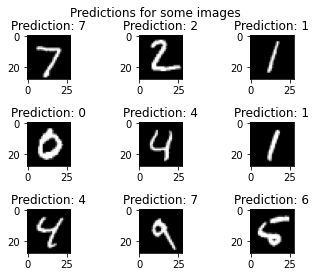

In [20]:
X_test_img = X_test.reshape((X_test.shape[0], 28, 28))
for i in range(9):  
  plt.subplot(330 + 1 + i)
  plt.imshow(X_test_img[i], cmap=plt.get_cmap('gray'))
  plt.title(f"Prediction: {y_pred[i]}")
plt.suptitle("Predictions for some images")
plt.subplots_adjust(wspace=0, hspace=1)
plt.show()

**Ex. 6.** Please provide F1 result, confusion matrix and classification report. 

In [21]:
f1 = f1_score(y_test, y_pred, average='micro')
print(f'F1 = {f1:.2f}')

print(f"Confusion matrix: {confusion_matrix(y_test, y_pred)}")

print(f"Classification report: {classification_report(y_test, y_pred)}")

F1 = 0.87
Confusion matrix: [[ 917    1   10    9    6   10    6    4   14    3]
 [   1 1088   12   12    2    5    3    1   11    0]
 [  14   11  867   19   20   10    9   35   36   11]
 [   8    4   39  843    6   47    3   19   23   18]
 [   3    4    7    7  832    8   13    8   28   72]
 [  16    7    4   49   13  719   21    8   31   24]
 [  24    5   13    6   33   18  830    3   23    3]
 [   2   14   25    9   10    5    1  907   11   44]
 [  11   10   26   37   14   24   18    9  793   32]
 [  13    3    5   31   24   15    4   14   34  866]]
Classification report:               precision    recall  f1-score   support

           0       0.91      0.94      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.84      0.85      1032
           3       0.82      0.83      0.83      1010
           4       0.87      0.85      0.86       982
           5       0.84      0.81      0.82       892
           6       0.91      0.87      